<a href="https://colab.research.google.com/github/itissandeep98/ML-Assignments/blob/master/Assignment2/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [137]:
import h5py 
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from math import pi,exp,sqrt
import matplotlib.pyplot as plt

In [2]:
from sklearn import metrics 
from sklearn.manifold import TSNE
from sklearn.utils import resample
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression

## Pre Processing

In [3]:
class MyPreProcessor():
  """
  My steps for pre-processing for the three datasets.
  """

  def __init__(self):
    pass
  def convert_n_to_1(self,mat):
    z=np.zeros((mat.shape[0]))
    for i in range(mat.shape[1]):
      z[mat[:,i]==1]=i
    z=z.astype(int)
    return z

  def pre_process(self, dataset):
    """
    Reading the file and preprocessing the input and output.
    Note that you will encode any string value and/or remove empty entries in this function only.
    Further any pre processing steps have to be performed in this function too. 

    Parameters
    ----------

    dataset : integer with acceptable values 0, 1, or 2
    0 ->  Dataset
    1 ->  Dataset
    2 ->  Dataset

    Returns
    -------
    X : 2-dimensional numpy array of shape (n_samples, n_features)
    y : 1-dimensional numpy array of shape (n_samples,)
    """
    scaler = StandardScaler()
    if dataset == 0:
      df=h5py.File("/content/drive/My Drive/part_A_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)
    
    elif dataset == 1:
      df=h5py.File("/content/drive/My Drive/part_B_train.h5", "r")
      X=np.array(df['X'])
      y=np.array(df['Y'])
      y=self.convert_n_to_1(y)
      X = scaler.fit_transform(X)

    elif dataset == 2:
      df=pd.read_csv("/content/drive/My Drive/weight-height.csv")
      df['Gender'].replace('Male',0,inplace=True)
      df['Gender'].replace('Female',1,inplace=True)
      df['Height'],df['Weight']=df['Weight'].copy(),df['Height'].copy()
      df=df.sample(frac=1,random_state=4)
     
      X=df['Height'].to_numpy()
      X=np.reshape(X,(X.shape[0],1))
      y=df['Weight'].to_numpy()
    
    return X, y

## Q1

In [4]:
def analysis(X_train, X_test, y_train, y_test):
  logistic = LogisticRegression(max_iter=10000)
  logistic.fit(X_train,y_train)
  y_pred=logistic.predict(X_test)

  print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

  tsne = TSNE(n_components=2, verbose=2, n_iter=1000)
  tsne_results = tsne.fit_transform(X_train)

  plt.figure(figsize=(16,10))
  sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=y_train,
    palette=sns.color_palette("hls", 10),
    legend="full"
  )

In [5]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(0)
print(X.shape,y.shape)

(4200, 784) (4200,)


### d)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)
freq = np.bincount(y_train)
items = np.nonzero(freq)[0]
print("Training Sample")
print("size:",y_train.shape[0])
print(*list(zip(items,freq[items]))) 
freq = np.bincount(y_test)
items = np.nonzero(freq)[0]
print("Testing Sample")
print("size:",y_test.shape[0])
print(*list(zip(items,freq[items]))) 

Training Sample
size: 3360
(0, 320) (1, 395) (2, 314) (3, 339) (4, 333) (5, 319) (6, 353) (7, 345) (8, 328) (9, 314)
Testing Sample
size: 840
(0, 80) (1, 99) (2, 79) (3, 85) (4, 83) (5, 79) (6, 88) (7, 86) (8, 82) (9, 79)


### e)

Accuracy: 0.8928571428571429
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.022s...
[t-SNE] Computed neighbors for 3360 samples in 1.223s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.436530
[t-SNE] Computed conditional probabilities in 0.218s
[t-SNE] Iteration 50: error = 84.1129150, gradient norm = 0.0035821 (50 iterations in 1.595s)
[t-SNE] Iteration 100: error = 78.8914032, gradient norm = 0.0040863 (50 iterations in 1.538s)
[t-SNE] Iteration 150: error = 78.6420898, gradient norm = 0.0004225 (50 iterations in 1.330s)
[t-SNE] Iteration 200: error = 78.6392899, gradient norm = 0.0000688 (50 iterations in 1.294s)
[t-SNE] Iteration 250: error = 78.6389008, gradient norm = 0.0000517 (50 iterations in 1.307s)
[t-SNE] KL

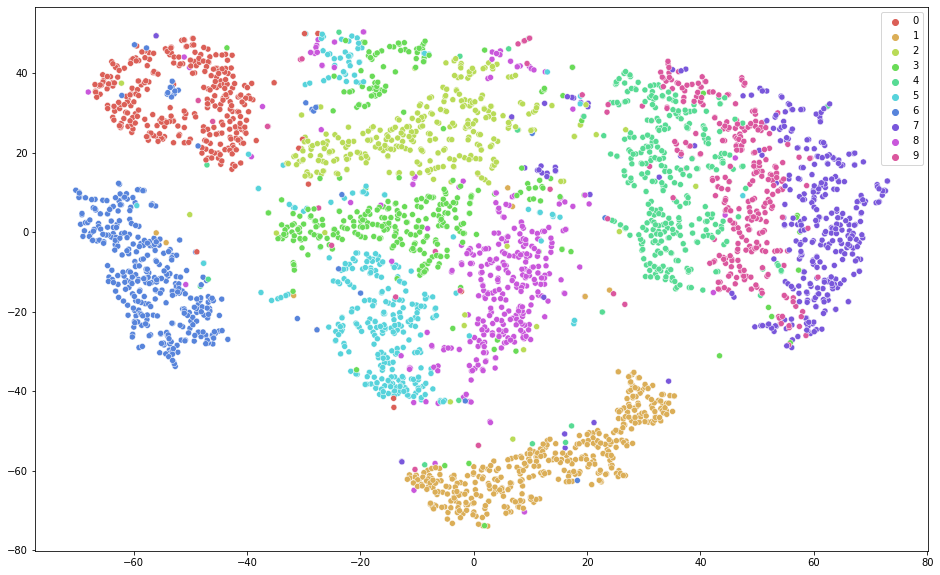

In [7]:
pca = PCA(n_components=50) 
X_train_pca = pca.fit_transform(X_train) 
X_test_pca = pca.transform(X_test) 
analysis(X_train_pca, X_test_pca, y_train, y_test)

### f)

Accuracy: 0.8916666666666667
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3360 samples in 0.020s...
[t-SNE] Computed neighbors for 3360 samples in 1.222s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3360
[t-SNE] Computed conditional probabilities for sample 2000 / 3360
[t-SNE] Computed conditional probabilities for sample 3000 / 3360
[t-SNE] Computed conditional probabilities for sample 3360 / 3360
[t-SNE] Mean sigma: 4.453402
[t-SNE] Computed conditional probabilities in 0.206s
[t-SNE] Iteration 50: error = 84.1329727, gradient norm = 0.0024874 (50 iterations in 1.692s)
[t-SNE] Iteration 100: error = 78.8418274, gradient norm = 0.0037491 (50 iterations in 1.461s)
[t-SNE] Iteration 150: error = 78.6257935, gradient norm = 0.0003874 (50 iterations in 1.358s)
[t-SNE] Iteration 200: error = 78.6233215, gradient norm = 0.0001109 (50 iterations in 1.344s)
[t-SNE] Iteration 250: error = 78.6226273, gradient norm = 0.0015043 (50 iterations in 1.328s)
[t-SNE] KL

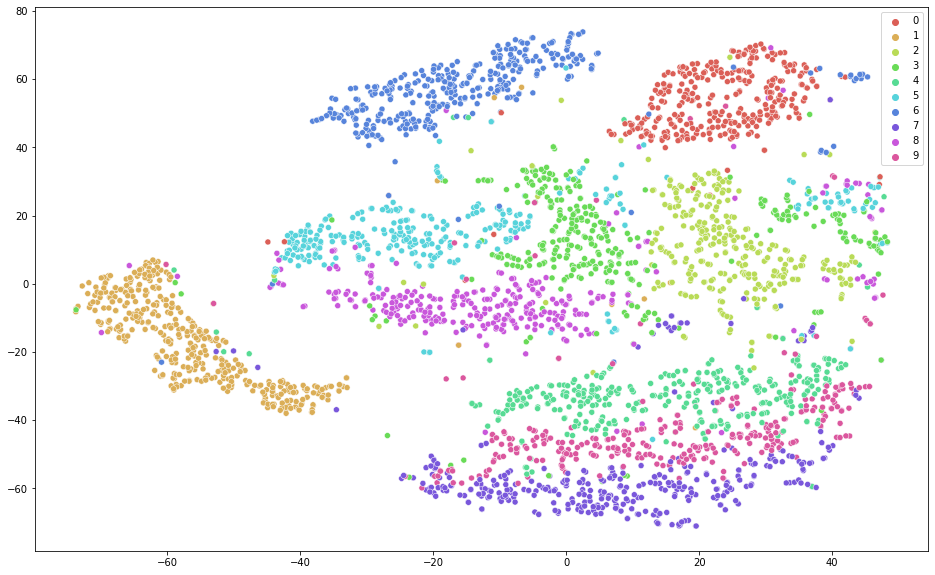

In [8]:
svd = TruncatedSVD(n_components=50)
X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.transform(X_test)
analysis(X_train_svd, X_test_svd, y_train, y_test)

## Q2

In [9]:
def create_sample(X_train,y_train):
  y=np.array([])
  X=np.array([])
  
  for i in range(y_train.shape[0]):
    idx=np.random.randint(0,y_train.shape[0])
    X=np.append(X,X_train[idx])
    y=np.append(y,y_train[idx])
  X=X.reshape((X.shape[0],1))
  return X,y


In [10]:
preprocessor= MyPreProcessor()
X,y=preprocessor.pre_process(2)
B=100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

predictions=None
for _ in range(B):
  X_temp,y_temp=create_sample(X_train,y_train)

  linear=LinearRegression()
  linear.fit(X_temp,y_temp)

  temp=X_test.dot(linear.coef_)+linear.intercept_
  temp=temp.reshape((temp.shape[0],1))

  if(predictions is not None):
    predictions=np.concatenate((predictions,temp),axis=1)
  else:
    predictions=temp
  
avg_pred=np.mean(predictions,axis=1)
diff=avg_pred-y_test

bias=np.sum(abs(diff))/X_test.shape[0]

avg=avg_pred.reshape((avg_pred.shape[0],1))
variance=(1/(B-1))*np.sum((predictions-avg)**2,axis=1)
variance=np.sum(variance)/X_test.shape[0]

y_test=y_test.reshape((y_test.shape[0],1))
MSE=(1/B)*np.sum((predictions-y_test)**2,axis=1)
MSE=np.sum(MSE)/X_test.shape[0]

print("Bias:",bias)
print("Variance:",variance)
print("MSE:",MSE)
print(MSE-bias**2-variance)

Bias: 1.1784358251752556
Variance: 0.0004881051002432712
MSE: 2.168756616007141
0.7795575168504123


## Q3

In [157]:
class GridSearch():
  def __init__(self,estimator,**kwargs):
    self.estimator=estimator
    self.k=10
    self.param_names=list(kwargs.keys())
    self.param_values=list(kwargs.values())
    print(self.param_names)
    print(self.param_values)
    # print(help(estimator))

  def fit(self,X,y):
    X_fit, X_test, y_fit, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=40)
    m=X_fit.shape[0] # number of samples

    split_start=0 # initial split's first index
    split_end=m//self.k # initial split's last index
    score=-1

    for i in range(self.k):

      X_train=np.concatenate((X_fit[:split_start],X_fit[split_end:]),axis=0)
      y_train=np.concatenate((y_fit[:split_start],y_fit[split_end:]),axis=0)

      X_val=X[split_start:split_end]
      y_val=y[split_start:split_end]

      pos=[0]*len(self.param_names)
      temp_score,temp_param=self.perform_grid(X_train,y_train,X_val,y_val,pos)
      print(temp_score,temp_param)
      if(temp_score>score):
        score=temp_score
        param=temp_param

      split_start=split_end 
      split_end+=m//self.k

   
    score_val=self.estimator.score(X_test,y_test)
    

    return score_val*100,score*100,param


  def perform_grid(self,X_train,y_train,X_val,y_val,pos):
    param={}
    for i in range(len(pos)):
      param[self.param_names[i]]=self.param_values[i][pos[i]]
    self.estimator.set_params(**param)
    self.estimator.fit(X,y)
    score=self.estimator.score(X_val,y_val)

    for i in range(len(pos)):
      if(pos[i]+1<len(self.param_values[i])):
        temp=pos[:i]+[pos[i]+1]+pos[i+1:]
        temp_score,temp_param=self.perform_grid(X_train,y_train,X_val,y_val,temp)
        if(temp_score>score):
          score=temp_score
          param=temp_param

    return score,param

In [175]:
def plot_dept_acc(data,min_depth=2,max_depth=40,state=1):
  preprocessor = MyPreProcessor()
  X, y = preprocessor.pre_process(data)
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.10,random_state=state)
  pca = PCA(n_components=50) 
  X_train = pca.fit_transform(X_train) 
  X_test = pca.transform(X_test) 
  score_val=[]
  score_train=[]
  depths=list(range(min_depth,max_depth))
  for depth in depths:
    dt= DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train,y_train)
    score_val.append(dt.score(X_test,y_test)*100)
    score_train.append(dt.score(X_train,y_train)*100)
  plt.plot(depths,score_val,color="g", label="validation Accuracy")
  plt.plot(depths,score_train,color="r", label="training Accuracy")
  plt.xlabel('Depth')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

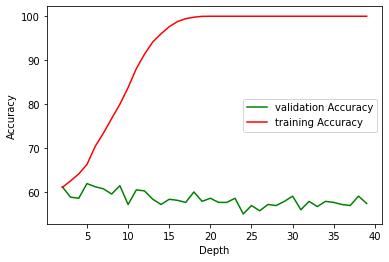

In [178]:
plot_dept_acc(1,state=30)

In [159]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(1)

dt= DecisionTreeClassifier()
params = {'max_depth': list(range(2, 13))}
grid_search_cv = GridSearch(dt,**params)

# gnb=GaussianNB()
# params={'var_smoothing':[10**i for i in range(1,-10,-1)]}
# grid_search_cv = GridSearch(gnb,**params)

grid_search_cv.fit(X, y)

['max_depth']
[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
0.9315476190476191 {'max_depth': 12}
0.9345238095238095 {'max_depth': 12}
0.9553571428571429 {'max_depth': 12}
0.9494047619047619 {'max_depth': 12}
0.9583333333333334 {'max_depth': 12}
0.9523809523809523 {'max_depth': 12}
0.9345238095238095 {'max_depth': 12}
0.9375 {'max_depth': 12}
0.9613095238095238 {'max_depth': 12}
0.9464285714285714 {'max_depth': 12}


(93.69047619047619, 96.13095238095238, {'max_depth': 12})

In [140]:
loaded_model = pickle.load(open("test", 'rb'))
loaded_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
preprocessor = MyPreProcessor()
X, y = preprocessor.pre_process(1)
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.20)
dt= DecisionTreeClassifier()
params = {'max_depth': list(range(2, 40))}
grid_search_cv = GridSearchCV(dt, params, verbose=1, cv=10,n_jobs=2)
grid_search_cv.fit(X_train, y_train)
grid_search_cv.best_estimator_

Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed: 10.5min
[Parallel(n_jobs=2)]: Done 380 out of 380 | elapsed: 24.0min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Q4

### Implementation

In [13]:
class NaiveBayes():
  def __init__(self):
    pass

  def calculateStats(self,X,size):
    stats = np.array([[np.mean(col), np.var(col),X.shape[0]/size] for col in zip(*X)])
    return stats

  def separateByClass(self,X,y):
    separated={}
    for i in range(X.shape[0]):
      if(y[i] in separated):
        separated[y[i]]=np.concatenate([separated[y[i]],[X[i]]])
      else:
        separated[y[i]]=[X[i]]
    
    return separated

  def fit(self,X,y):
      separated= self.separateByClass(X,y)
      self.stats={}
      for label in separated:
        self.stats[label]=self.calculateStats(separated[label],X.shape[0])
        
      return self.stats

  def calculateGaussian(self,x, mean, var):
    if(var<10**-7):
      return 0
    exponent = -((x-mean)**2 / (2 * var ))
    return np.log((1 / np.sqrt(2 * pi * var))) + exponent

  
  def calculateClassProbability(self,X):
    probabilities={}
    for label in self.stats:
      probabilities[label]=0
      for col in range(X.shape[0]):
        mean,var,_=self.stats[label][col]
        probabilities[label]+=self.calculateGaussian(X[col],mean,var)
        assert probabilities[label]!=float("-inf"),"data:"+str(mean)+" "+str(var) +" col:"+str(col)

    return probabilities


  def getPrediction(self,X):
    bestlabel=0
    max_prob=float("-inf")
    probabilities=self.calculateClassProbability(X)
    # print(probabilities)
    for label in probabilities:
      if(max_prob<probabilities[label]):
        max_prob=probabilities[label]
        bestlabel=label
    return bestlabel


  def predict(self,X):
    y=np.array([])
    for i in range(X.shape[0]):
      yi=self.getPrediction(X[i])
      y=np.append(y,yi)
    y=y.astype(int)
    return y
    

In [14]:
def naive_bayes(data,predictor):
  preprocessor = MyPreProcessor()
  X, y = preprocessor.pre_process(data)
  X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.1,random_state=40) 
  predictor.fit(X_train,y_train)
  y_pred=predictor.predict(X_test)
  return metrics.accuracy_score(y_test,y_pred)

### Dataset A

In [15]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(0,gnb))
print("Custom naive Bayes:",naive_bayes(0,nb))

SKlearn's naive Bayes: 0.5523809523809524
Custom naive Bayes: 0.7238095238095238


### Dataset B

In [16]:
nb=NaiveBayes()
gnb=GaussianNB()
print("SKlearn's naive Bayes:",naive_bayes(1,gnb))
print("Custom naive Bayes:",naive_bayes(1,nb))

SKlearn's naive Bayes: 0.5404761904761904
Custom naive Bayes: 0.5404761904761904
